# Linear regression with one variable

Demonstration of linear regression with one variable, by predicting house prices based on the number of rooms per house.

In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
# Boston house price dataset
# http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
houses = datasets.load_boston()

In [3]:
houses.data.shape

(506, 13)

There are 506 examples, each with 13 features. We'll just use one feature - the average number of rooms per house, which is feature 5.

In [4]:
# Average number of rooms per house
X = houses.data[:, 5]

# Take a peek
X[:5]

array([ 6.575,  6.421,  7.185,  6.998,  7.147])

The dataset is averaged over >506 actual houses, hence we can have non-integer number of rooms.

In [5]:
# Average house price ($10,000), our target variable
y = houses.target

# Take a peek
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

## Visualise data

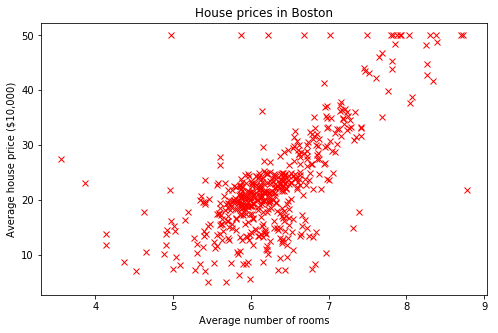

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'rx')
plt.title('House prices in Boston')
plt.ylabel('Average house price ($10,000)')
plt.xlabel('Average number of rooms')
plt.show()

The multiple examples with an average price of exactly $500,000 are clearly not natural. We don't want to train on these examples since they're going to mess up the "linear" part of our linear regression.

In [7]:
np.sum(y==50)/len(y)

0.031620553359683792

These examples only make up ~3% of our dataset. So, while we will obviously not be able to correctly predict the price of these examples, the overall effect on our final metrics should be small.

## Clean and format data

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Remove training examples with price of exactly $500,000
to_remove = np.argwhere(y_train==50)
y_train = np.delete(y_train, to_remove)
X_train = np.delete(X_train, to_remove)

In [10]:
# LinearRegression() requires 2D arrays
y_train = y_train[:, np.newaxis]
X_train = X_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
X_test = X_test[:, np.newaxis]

## Train and test linear regression

In [11]:
# Train
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Test
y_pred = model.predict(X_test)

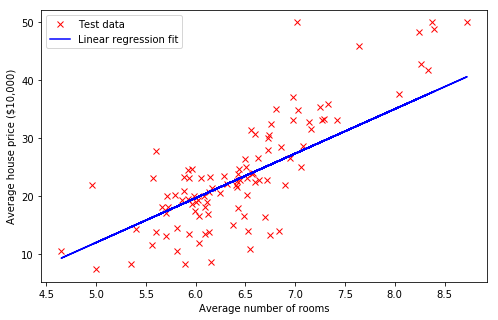

In [13]:
# Display test data and fit
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, 'rx', label='Test data')
plt.plot(X_test, y_pred, 'b-', label='Linear regression fit')
plt.legend()
plt.ylabel('Average house price ($10,000)')
plt.xlabel('Average number of rooms')
plt.show()

In [14]:
# Quantify performance
print('Gradient: $%.0f per room.' % (model.coef_*10000))
print('Median absolute error: $%.0f.' % (median_absolute_error(y_test, y_pred)*10000))
print('R2 score: %.2f.' % (r2_score(y_test, y_pred)))

Gradient: $76793 per room.
Median absolute error: $35667.
R2 score: 0.62.
